In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.zip.zip to data.zip.zip


In [ ]:
import zipfile, os

zip_path = "/content/data.zip.zip"
extract_path = "/content/vehicle_new_dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)
!ls -R /content/vehicle_new_dataset | head -n 40


✅ Extracted to: /content/vehicle_new_dataset
/content/vehicle_new_dataset:
classes.txt
images
labels
notes.json

/content/vehicle_new_dataset/images:
07d1f068-WhatsApp_Image_2025-10-17_at_12.25.08_f6f9d154.jpg
08679691-WhatsApp_Image_2025-10-17_at_12.25.13_aea1c59e.jpg
0f9ef65f-WhatsApp_Image_2025-10-17_at_12.25.12_6ba45e6c.jpg
175c0e83-WhatsApp_Image_2025-10-17_at_12.25.08_522bf640.jpg
1ab2353d-IMG-20251017-WA0013.jpg
1efbbb43-WhatsApp_Image_2025-10-17_at_12.25.13_a35533cd.jpg
237fe4d2-WhatsApp_Image_2025-10-17_at_12.25.07_25a772c7.jpg
2cc81411-IMG-20251017-WA0006.jpg
4297b88e-IMG-20251017-WA0008.jpg
435f6dfa-WhatsApp_Image_2025-10-17_at_12.25.12_26dc1ccf.jpg
441c7490-WhatsApp_Image_2025-10-17_at_12.25.08_93e8fb0b.jpg
4ebeef02-WhatsApp_Image_2025-10-17_at_12.25.09_f004b9db.jpg
557512e5-WhatsApp_Image_2025-10-17_at_12.25.06_cb8c0500.jpg
5a927441-WhatsApp_Image_2025-10-17_at_12.25.12_34f76d0a.jpg
650fa891-WhatsApp_Image_2025-10-17_at_12.25.11_73dfb19b.jpg
6a75398e-IMG-20251017-WA0009.jp

In [ ]:
with open("/content/vehicle_new_dataset/classes.txt") as f:
    classes = [line.strip() for line in f if line.strip()]
print("Classes:", classes)


Classes: ['Autorickshaw', 'Bike', 'Car', 'Lorry']


In [ ]:
yaml_content = f"""train: /content/vehicle_new_dataset/images
val: /content/vehicle_new_dataset/images

nc: 4
names: {classes}
"""

with open("/content/vehicle_new_dataset/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml created successfully!")
!cat /content/vehicle_new_dataset/data.yaml


✅ data.yaml created successfully!
train: /content/vehicle_new_dataset/images
val: /content/vehicle_new_dataset/images

nc: 4
names: ['Autorickshaw', 'Bike', 'Car', 'Lorry']


In [ ]:
!pip install -q ultralytics opencv-python matplotlib

from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # lightweight model for quick training

model.train(
    data="/content/vehicle_new_dataset/data.yaml",
    epochs=40,          # increase for more accuracy
    imgsz=640,
    batch=8,
    project="runs/vehicle_training",
    name="yolo_vehicle_model_new"
)


Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vehicle_new_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_vehicle_model_new3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a94e6d6c1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Saving WhatsApp Image 2025-10-17 at 12.25.13_a35533cd.jpg to WhatsApp Image 2025-10-17 at 12.25.13_a35533cd.jpg
📸 Image uploaded: WhatsApp Image 2025-10-17 at 12.25.13_a35533cd.jpg

image 1/1 /content/WhatsApp Image 2025-10-17 at 12.25.13_a35533cd.jpg: 384x640 1 Car, 198.1ms
Speed: 4.3ms preprocess, 198.1ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


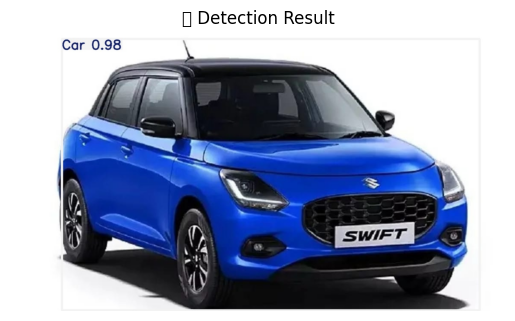

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# 1️⃣ Let user upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"📸 Image uploaded: {img_path}")

    # 2️⃣ Run prediction
    results = model.predict(source=img_path, conf=0.25)

    # 3️⃣ Save and display output
    results[0].save(filename="result.jpg")

    img = cv2.imread("result.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title("🔍 Detection Result")
    plt.show()


Saving IMG-20251017-WA0005.jpg to IMG-20251017-WA0005.jpg
📸 Image uploaded: IMG-20251017-WA0005.jpg

image 1/1 /content/IMG-20251017-WA0005.jpg: 448x640 1 Lorry, 234.3ms
Speed: 4.9ms preprocess, 234.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


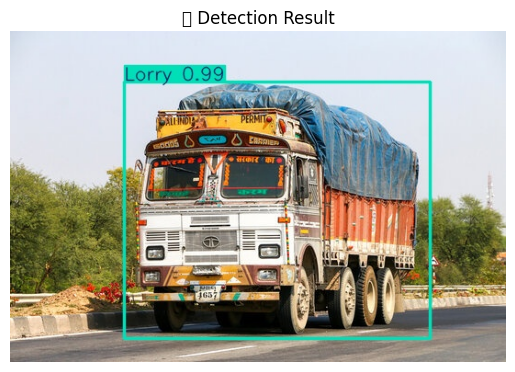

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# 1️⃣ Let user upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"📸 Image uploaded: {img_path}")

    # 2️⃣ Run prediction
    results = model.predict(source=img_path, conf=0.25)

    # 3️⃣ Save and display output
    results[0].save(filename="result.jpg")

    img = cv2.imread("result.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title("🔍 Detection Result")
    plt.show()


Saving WhatsApp Image 2025-10-17 at 12.25.08_f6f9d154.jpg to WhatsApp Image 2025-10-17 at 12.25.08_f6f9d154.jpg
📸 Image uploaded: WhatsApp Image 2025-10-17 at 12.25.08_f6f9d154.jpg

image 1/1 /content/WhatsApp Image 2025-10-17 at 12.25.08_f6f9d154.jpg: 640x640 1 Autorickshaw, 202.7ms
Speed: 5.4ms preprocess, 202.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


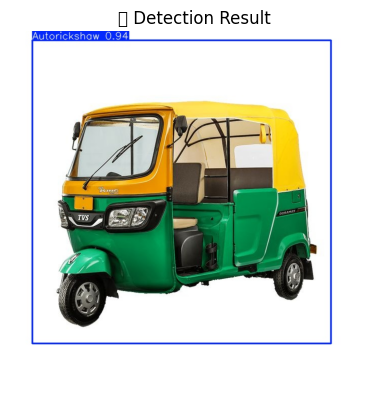

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# 1️⃣ Let user upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"📸 Image uploaded: {img_path}")

    # 2️⃣ Run prediction
    results = model.predict(source=img_path, conf=0.25)

    # 3️⃣ Save and display output
    results[0].save(filename="result.jpg")

    img = cv2.imread("result.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title("🔍 Detection Result")
    plt.show()


Saving WhatsApp Image 2025-10-18 at 12.58.04_450285fa.jpg to WhatsApp Image 2025-10-18 at 12.58.04_450285fa.jpg
📸 Image uploaded: WhatsApp Image 2025-10-18 at 12.58.04_450285fa.jpg

image 1/1 /content/WhatsApp Image 2025-10-18 at 12.58.04_450285fa.jpg: 448x640 1 Bike, 140.0ms
Speed: 3.0ms preprocess, 140.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


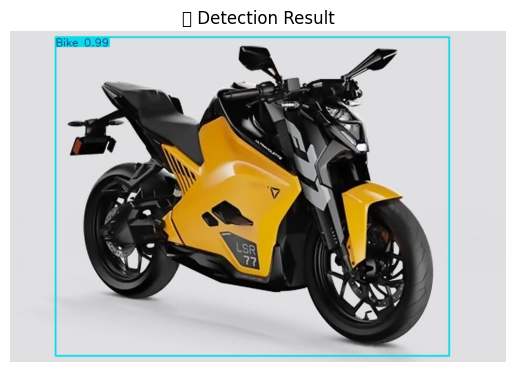

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# 1️⃣ Let user upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"📸 Image uploaded: {img_path}")

    # 2️⃣ Run prediction
    results = model.predict(source=img_path, conf=0.25)

    # 3️⃣ Save and display output
    results[0].save(filename="result.jpg")

    img = cv2.imread("result.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title("🔍 Detection Result")
    plt.show()


Saving images.jpeg to images.jpeg
📸 Image uploaded: images.jpeg

image 1/1 /content/images.jpeg: 480x640 1 Car, 248.9ms
Speed: 9.4ms preprocess, 248.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


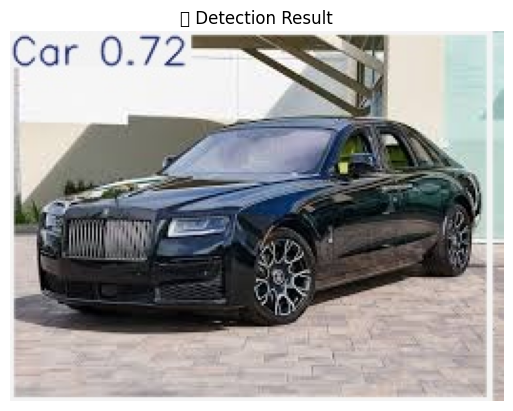

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# 1️⃣ Let user upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"📸 Image uploaded: {img_path}")

    # 2️⃣ Run prediction
    results = model.predict(source=img_path, conf=0.25)

    # 3️⃣ Save and display output
    results[0].save(filename="result.jpg")

    img = cv2.imread("result.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title("🔍 Detection Result")
    plt.show()


Saving motorcycle-car-model-isolated-on-600nw-2190829063.webp to motorcycle-car-model-isolated-on-600nw-2190829063.webp
📸 Image uploaded: motorcycle-car-model-isolated-on-600nw-2190829063.webp

image 1/1 /content/motorcycle-car-model-isolated-on-600nw-2190829063.webp: 448x640 2 Bikes, 171.9ms
Speed: 7.8ms preprocess, 171.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


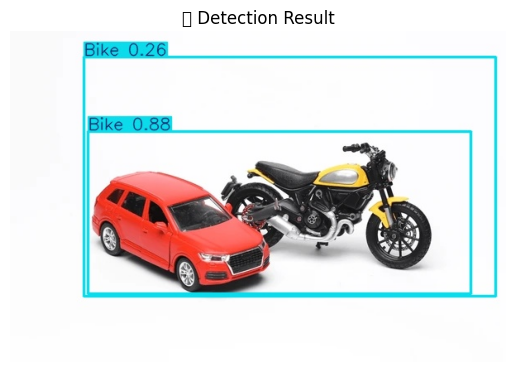

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# 1️⃣ Let user upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"📸 Image uploaded: {img_path}")

    # 2️⃣ Run prediction
    results = model.predict(source=img_path, conf=0.25)

    # 3️⃣ Save and display output
    results[0].save(filename="result.jpg")

    img = cv2.imread("result.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title("🔍 Detection Result")
    plt.show()


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# Validate using your dataset
results = model.val(data="/content/vehicle_new_dataset/data.yaml")

# Print key metrics
print("Validation results:")
print(f"mAP50: {results.box.map50:.3f}")
print(f"mAP50-95: {results.box.map:.3f}")
print(f"Precision: {results.box.mp:.3f}")
print(f"Recall: {results.box.mr:.3f}")


Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 911.6±251.5 MB/s, size: 41.0 KB)
val: Scanning /content/vehicle_new_dataset/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 40/40 34.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 0.3it/s 9.2s
                   all         40         40      0.994          1      0.995      0.941
          Autorickshaw         10         10      0.993          1      0.995      0.892
                  Bike         10         10      0.992          1      0.995       0.93
                   Car         10         10      0.995          1      0.995      0.959
                 Lorry         10         10      0.994          1      0.995      0.985
Speed: 5.7ms preprocess, 200.5ms inference, 0.

Saving free-photo-of-red-helicopter-in-flight.jpeg to free-photo-of-red-helicopter-in-flight.jpeg
📸 Image uploaded: free-photo-of-red-helicopter-in-flight.jpeg

image 1/1 /content/free-photo-of-red-helicopter-in-flight.jpeg: 448x640 (no detections), 137.1ms
Speed: 3.7ms preprocess, 137.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


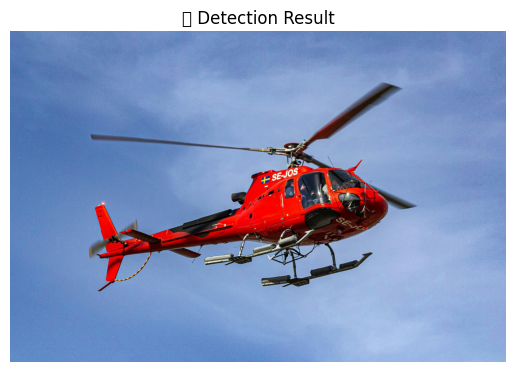

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("runs/vehicle_training/yolo_vehicle_model_new/weights/best.pt")

# 1️⃣ Let user upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"📸 Image uploaded: {img_path}")

    # 2️⃣ Run prediction
    results = model.predict(source=img_path, conf=0.25)

    # 3️⃣ Save and display output
    results[0].save(filename="result.jpg")

    img = cv2.imread("result.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title("🔍 Detection Result")
    plt.show()